# IMPORT LIBRARIES

In [1]:
import pandas as pd  # data analysis and manipulation

import numpy as np  # support for data structures like arrays and matrices

import matplotlib.pyplot as plt # basic data visualization library
# Here, we import pyplot from matplotlib. Pyplot provides a method for plotting in a Matlab way
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import networkx as nx
from networkx.algorithms import community
from itertools import chain
sns.set()
# Seaborn runs on top of Matplotlib. As default, it comes with a white background. With this line of code, we switch our plot to Seaborn default using .set() function.
%matplotlib inline

# READ THE DATASET

In [2]:
dataset = pd.read_csv("bitcoin.csv", header=None, names=['Source', 'Target', 'Rating', 'Time'])
dataset.head()

Source  Target  Rating          Time
0       6       2       4  1.289242e+09
1       6       5       2  1.289242e+09
2       1      15       1  1.289243e+09
3       4       3       7  1.289245e+09
4      13      16       8  1.289254e+09

In [3]:
dataset.shape # 35502 rows and 4 columns in the dataset.

(35592, 4)

In [4]:
print(dataset.columns) # the dataset has four columns: source, target, rating (from -10 to 10), time (since epoch).

Index(['Source', 'Target', 'Rating', 'Time'], dtype='object')


# WHAT IS THE DISTRIBUTION OF TRUST RATINGS?

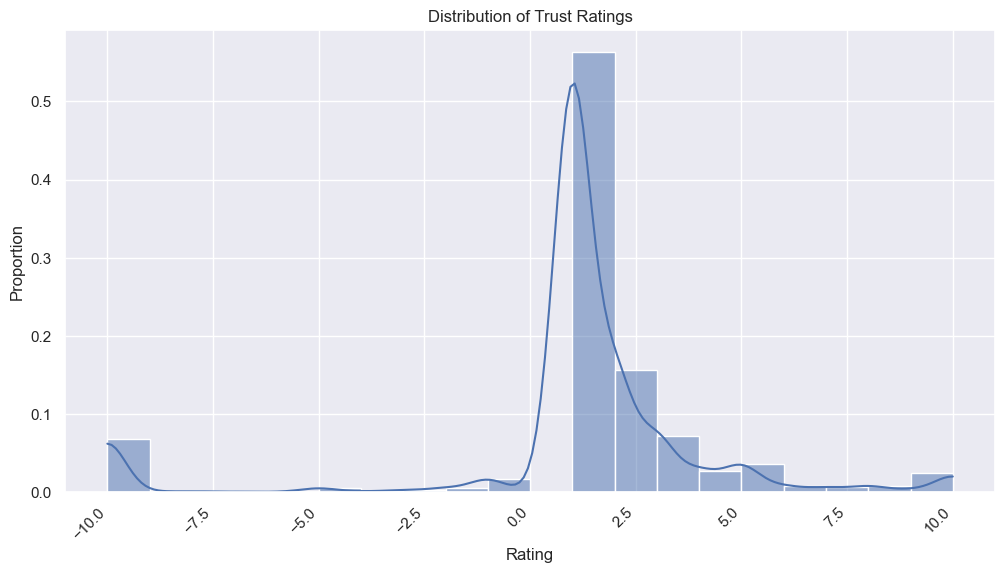

In [5]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("ticks")
g = sns.histplot(data = dataset, x = "Rating", stat = "proportion", binwidth = 1, kde = True)
ax.set_title('Distribution of Trust Ratings')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = "right")
ax.set_ylabel('Proportion')
plt.show()

The plot shows that users, on average, tend to give each other a positive rating (with the greatest proportion of ratings being 2). However, we can still observe many - 10 ratings, suggesting us that the well-functioning of the distributed network is put in danger by some risky users that are worth being analyzed in detail.

# LINEPLOT TO SHOW THE EVOLUTION OF AVERAGE TRUST IN THE NETWORK OVER TIME.

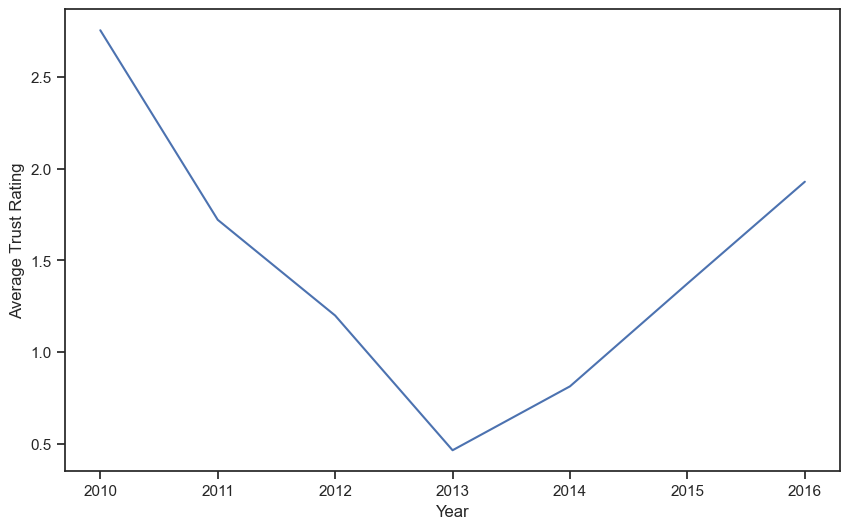

In [6]:
# Convert the 'Time' column to a datetime format
dataset["Time"] = pd.to_datetime(dataset["Time"], unit = "s")

# Create a new column 'Year' that contains only the year from the 'Time' column
dataset["Year"] = pd.DatetimeIndex(dataset["Time"]).year

# Group the data by the 'Year' column and calculate the mean trust rating for each year
average_rating_by_year = dataset.groupby("Year")["Rating"].mean()

# Create a line plot of the average trust rating over time
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlabel("Year")
ax.set_ylabel("Average Trust Rating")
ax.plot(average_rating_by_year.index, average_rating_by_year.values)
plt.show()

COMMENT

- As we said during the presentation of our first delivery where we showed a sketch of this graph, we would like to use this lineplot in order to conduct further research and reconstruct the history of the bitcoin blockchain in terms of events (ex scams, regulatory interventions) that had an impact on the trust level within the network. Going back to the average trust level in the bitcoin Blockchain, we can see that there is a peek around 2010, shortly after Satoshi Nakamoto officially introduced the technlogy. What we see in the lineplot makes sense: in the early stages of the technology people had high expectations and therefore firmly believed in the decentralized and distributed possibilities enabled by the disruptive technology and hence a high trust level in the network. We can also observe a negative trend between 2010 and 2013 where the average trust rating declined from around 2.7 to 0.5. Were there any events that negatively affected trust in the technology/network? If we do some research, we can see that the years 2010-2012 were characterized by negative events in terms of bugs, scams, exchanges shutdown and hackings which of course had a negative impact on the bitcoin blockchain reputation. For example, in late 2010 an hacker exploited a bug in the blockchain code and artificially created billions of blocks. Moreover, in mid 2011 an exchange which at the time handled more than 70% of transactions involving bitcoin was hacked and transactions were momentarily suspended. Many lawsuits followed which of course negatively impacted faith among participants. Overall, these events had a negative effect on the trust that users layed in the network. After the seizure of SilkRoad (a darknet marketplace where userts performed transactions using bitcoins) in 2013, we can see a positive trend between 2013 and 2016 with average trust going from 0.5 to almost 2.0. These years were characterized by few negative events in terms of scams and hackings and by the widespread adoption of the cryptocurrency by merchants and enterprises all over the world. This increased safety and extensive possibility to use the digital currency boosted trust that users put in the network. 

What we did in this small section was to reconstruct the history of the bitcoin Blockchain in terms of main events, starting from the "small" network of participants that we selected and then extending our analysis based on the consideration that the Bitcoin Blockchain is a large inter-connected system and events at global level (scams, hackings, shutdowns, interventions) will produce effects on smaller networks of participants.

# IS THERE A RELATIONSHIP BETWEEN AVERAGE TRUST RATING AND THE NUMBER OF TRANSACTION IN WHICH THE USER HAS BEEN INVOLVED?

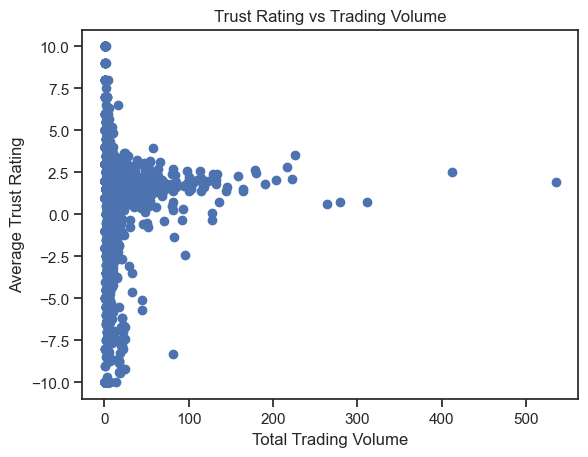

In [7]:
# Group the data by target and calculate their total trading volume and average trust rating.
grouped_data = dataset.groupby(["Target"]).agg({"Rating": "mean", "Time": "count"}).reset_index()
grouped_data = grouped_data.rename(columns = {"Rating": "Average Trust Rating", "Time": "Total Trading Volume"})

# Plot the data using a scatter plot
plt.scatter(grouped_data["Total Trading Volume"], grouped_data["Average Trust Rating"])
plt.title("Trust Rating vs Trading Volume")
plt.xlabel("Total Trading Volume")
plt.ylabel("Average Trust Rating")
plt.show()

The plot shows that the vast majority of targets have been rated few times and that there is not a correlation between average trust rating and total trading volume. However, we can still see that there are groups of traders who have similar trading volumes as well as ratings which could indicate that they have formed a sub-network or community within the larger Bitcoin blockchain network (probably around the 0-2.5 average rating and 0-100 total trading volume).

# SHALL WE INCLUDE OR NOT THE FOLLOWING GRAPH? I THINK NO SINCE WE HAVE ALREADY DONE A LINEPLOT TO SHOW THE EVOLUTION OF AVERAGE TRUST RATING OVER TIME

In [8]:
dataset['Time'] = pd.to_datetime(dataset['Time'], unit='s')

In [9]:
df_grouped = dataset.groupby('Time')['Rating'].sum().reset_index()
df_grouped
data_frame = df_grouped.query('Rating < 0 and Time > "2015-01-24"')
data_frame

Time  Rating
34680 2015-01-29 05:15:37.987859968     -10
34685 2015-01-31 13:59:56.789669888      -3
34691 2015-02-03 02:08:39.642070016      -1
34699 2015-02-04 20:56:25.602060032     -10
34703 2015-02-05 08:45:22.545840128     -10
...                             ...     ...
35545 2015-12-26 08:07:41.698460160     -10
35546 2015-12-26 08:09:12.213639936     -10
35549 2015-12-29 16:39:25.746690048     -10
35551 2016-01-03 01:49:53.247219968      -1
35585 2016-01-23 13:32:45.540189952     -10

[64 rows x 2 columns]

In [10]:
fig1 = px.line(
    data_frame = data_frame,
    x = 'Time',
    y = 'Rating'
)
fig1.show()

# SHALL WE INCLUDE THE FOLLOWING GRAPH? IT SHOWS THE EVOLUTION OF THE NUMBER OF NEGATIVE RATINGS OVER TIME (AFTER 2015). I THINK NO BUT WE MAY KEEP IT IF WE INCLUDE ALL THE YEARS.

In [25]:
dataset_neg = dataset.loc[dataset["Rating"] < 0] # create a dataset that contains only negative ratings

In [26]:
# This is how it looks like if we include all years
fig = px.histogram(dataset_neg,
                   x = "Time",
                   nbins = 24, # each bin corresponds to three months
                   labels={"Time": "Time", "Rating": "Rating"},
                   color_discrete_sequence=["blue"])


fig.update_layout(title= "Number of negative ratings by period",
                  xaxis_title= "Time", yaxis_title = "Count of negative ratings")


fig.show()

# NETWORK ANALYSIS WITH NETWORKX

In [24]:
import networkx as nx
import pandas as pd
dataset = pd.read_csv("bitcoin.csv", header=None, names=['Source', 'Target', 'Rating', 'Time'])
dataset.head()

Source  Target  Rating          Time
0       6       2       4  1.289242e+09
1       6       5       2  1.289242e+09
2       1      15       1  1.289243e+09
3       4       3       7  1.289245e+09
4      13      16       8  1.289254e+09

5881
35592
Each node has on average 6.052031967352491 incoming connections and 6.052031967352491 outgoing connections


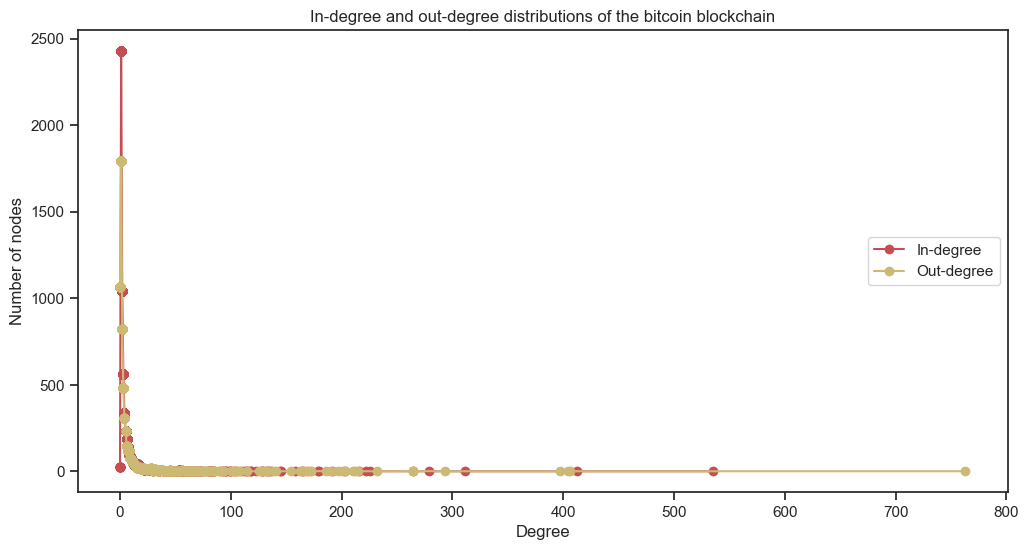

In [25]:
bitcoin_blockchain = nx.from_pandas_edgelist(dataset, source = "Source", target = "Target",
                                            edge_attr = "Rating", 
                                            create_using = nx.DiGraph())
# We represent the bitcoin blockchain as a directed graph. The edge starts from the rater and ends in the ratee.
# The weight of each edge is represented by the rating issued by the rater.
nx.is_directed(bitcoin_blockchain)
# How many nodes and how many edges are there in the graph?
print(bitcoin_blockchain.number_of_nodes())
print(bitcoin_blockchain.number_of_edges())
# The network consists of 5881 and 35592 edges.
# In an undirected graph there is no need to distinguish between in-degree and out-degree as each node is both 
# source and destination of a connection and the degree of a vertex is defined as the number of connections the vertex
# has. In a directed graph, we need to distinguish between in-degree (incoming connections) and out-degree (outgoing
# connections).
# G.in_degree() is a list that stores tuples of the form (node, in_degree)
# With the following code i compute the average in-degree and average out-degree to see how many incoming and
# outgoing connection a node has on average.
in_degrees = [degree for node, degree in bitcoin_blockchain.in_degree()] # list that stores in-degrees of each node.
out_degrees = [degree for node, degree in bitcoin_blockchain.out_degree()] # list that stores out-degrees of each node.
n_nodes = bitcoin_blockchain.number_of_nodes()
avg_in_degree = sum(in_degrees)/n_nodes
avg_out_degree = sum(out_degrees)/n_nodes
print(f"Each node has on average {avg_in_degree} incoming connections and {avg_out_degree} outgoing connections")
# Each node has on average the same number of incoming and outgoing edges. It might be more useful to visualize
# the degree distribution of the nodes (we plot the degree on the x-axis and the number of nodes for each degree
# on the y-axis. Of course we will use a different color for the in-degree and the out-degree).
incoming = sorted(in_degrees)
outgoing = sorted(out_degrees)
y_incoming = [in_degrees.count(x) for x in incoming] # we store the number of occurrences for each value in the 
# list containing sorted in-degrees.
y_outgoing = [out_degrees.count(x) for x in outgoing] # we do the same for sorted out-degrees.
# plot in-degree and out-degree distributions.
plt.figure(figsize=(12,6))
plt.title("In-degree and out-degree distributions of the bitcoin blockchain")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.plot(incoming, y_incoming, "ro-") # plot for the in-degree
plt.plot(outgoing, y_outgoing, "yo-") # plot for the out-degree
plt.legend(["In-degree", "Out-degree"], loc = "center right", frameon = True) # legend

We can see that there are many nodes with few connections and few nodes with larger degrees. This is what we
expect according to the theory seen in class as real networks (ex social networks of interactions of which
the bitcoin blockchain is an example) tend to follow a power-law distribution with lots of nodes having few 
connections and few nodes having large degrees rather than a bell distribution.

# BASIC ANALYSIS 

In [26]:
nx.info(bitcoin_blockchain)

'DiGraph with 5881 nodes and 35592 edges'

- a directed graph is (weakly) connected if its underlying undirected graph which is obtained by replacing directed edges with undirected edges is connected.
- a directed graph is (strongly) connected if for every pair of vertices (u,v) there is a directed path from u to v and from v to u.

In [27]:
# check connection
print(nx.is_weakly_connected(bitcoin_blockchain))
print(nx.is_strongly_connected(bitcoin_blockchain))

False
False


In [28]:
# number of weakly connected components.
nx.number_weakly_connected_components(bitcoin_blockchain)

4

In [29]:
# print the length of weakly connected components (in descending order).
length_wcc = [len(c) for c in sorted(nx.weakly_connected_components(bitcoin_blockchain), key=len, reverse = True)]
# we see that there is a weakly connected component of size 5875 and three weakly connected components of size 2.

In [30]:
# number of strongly connected components.
nx.number_strongly_connected_components(bitcoin_blockchain)

1144

In [31]:
# length of strongly connected components (in descending order).
length_scc = [len(c) for c in sorted(nx.strongly_connected_components(bitcoin_blockchain), key=len, reverse = True)]
# we see that there is a strongly connected component of size 4709 (gaint component?). All the other strongly connected components have
# size 1-2.

- Might it be a good idea to use condensation for plotting the graph? condensatioon (G, scc) returns the condensation of G where each strongly connected component is represented as a single node.
- Should i ignore single-node connected components and plot only the giant component which accounts for almost 80% of the nodes in the network?

# PLOT

In [32]:
trust = nx.get_edge_attributes(bitcoin_blockchain, "Rating")

In [33]:
pos = nx.spring_layout(bitcoin_blockchain)

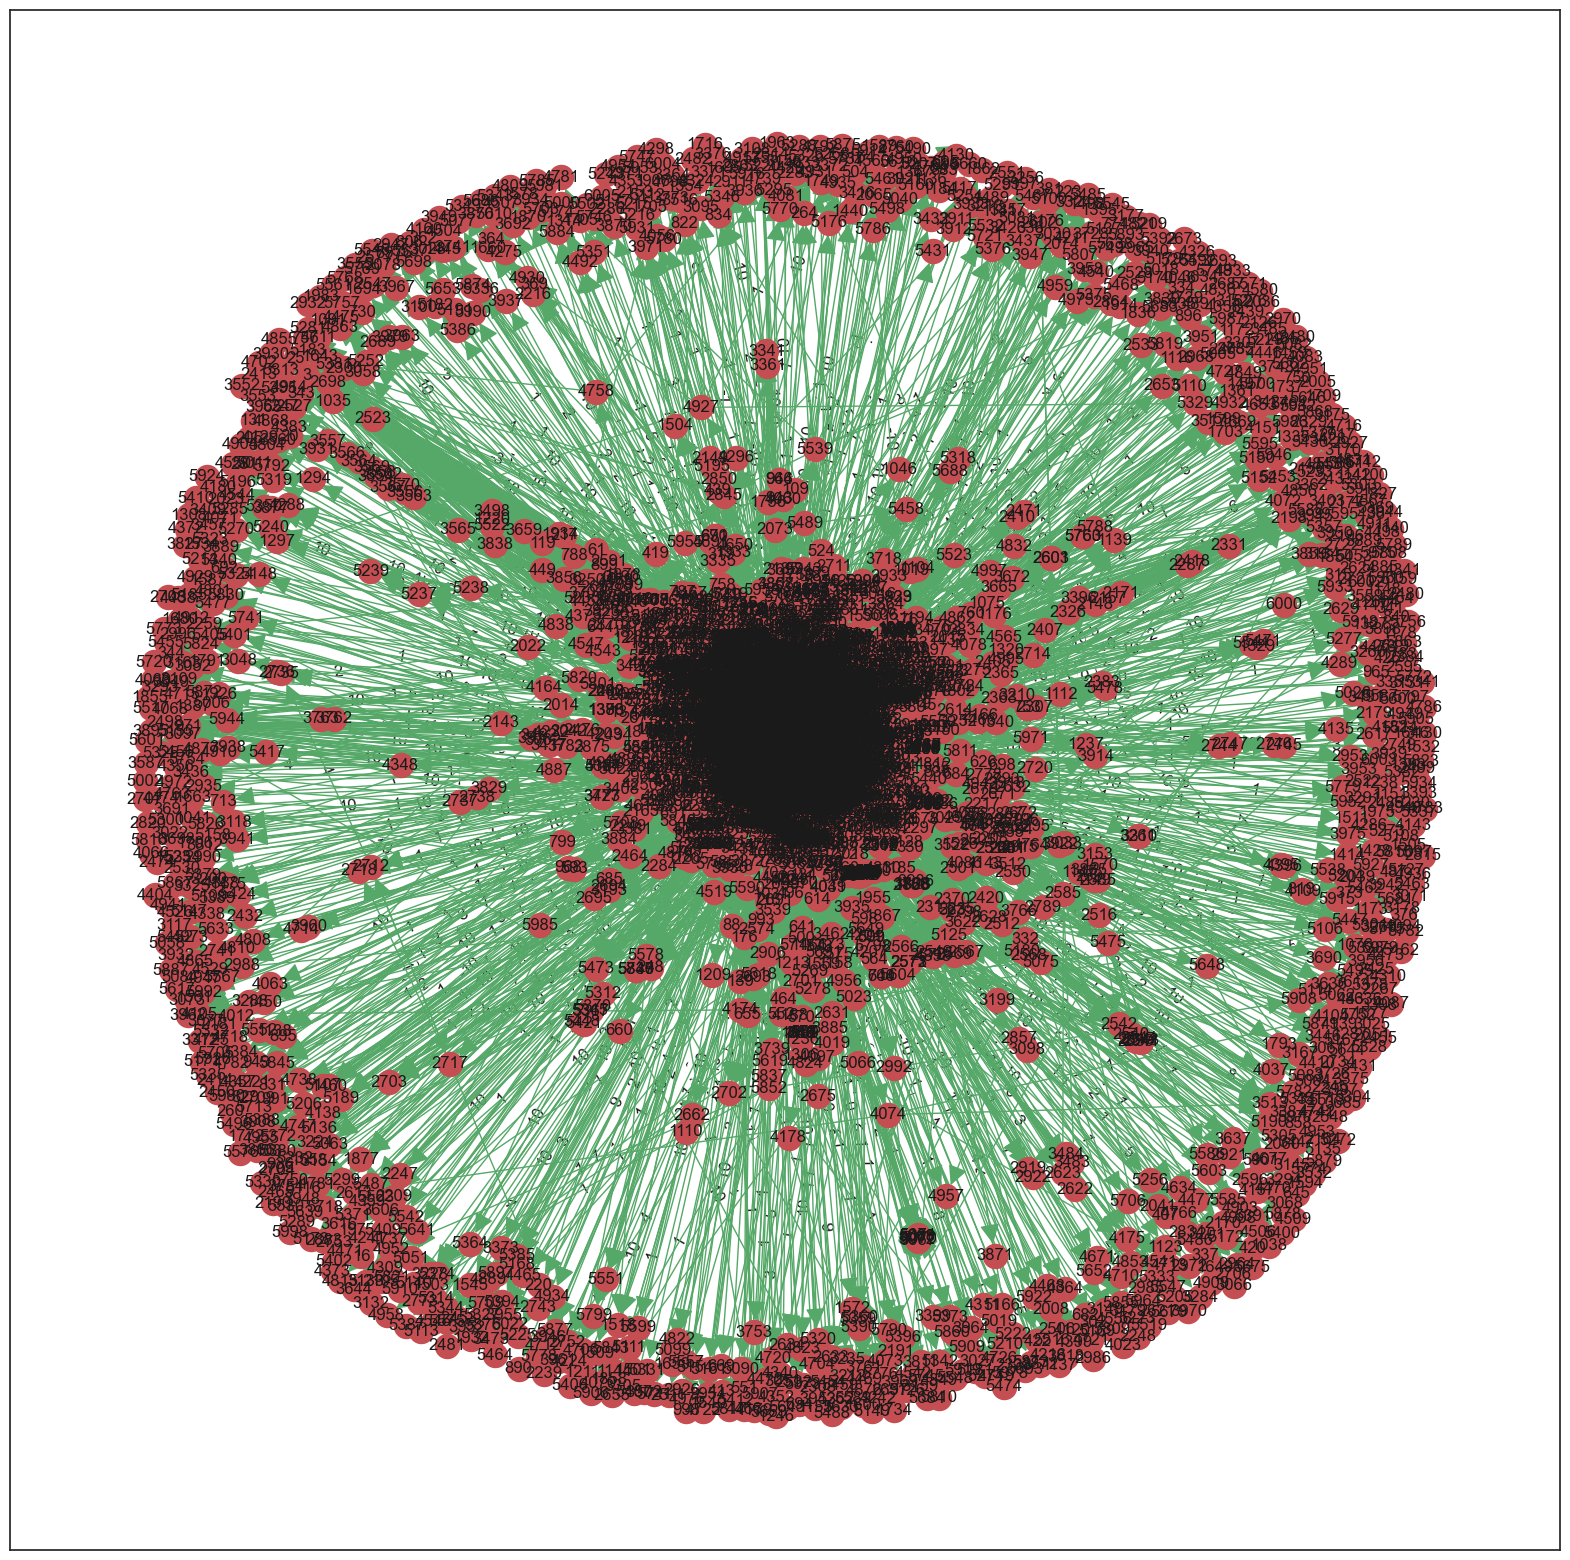

In [28]:
plt.figure(figsize = (20,20))
nx.draw_networkx_edge_labels(bitcoin_blockchain, pos = pos, edge_labels = trust, font_size = 12)
nx.draw_networkx(bitcoin_blockchain, pos = pos, with_labels = False, node_color = "r", edge_color = "g",
                node_size = 300, arrowsize = 30)
plt.show()

In [15]:
dataset.loc[dataset['Rating'] < 0, 'Rating'] = abs(dataset["Rating"])
#Crea un grafico interattivo con Plotly il rating va da 0 a -10, ma convertito in valore assoluto 
fig = px.scatter(dataset.query('Time>"2015-01-24"'), x='Time', y='Target', color='Rating', size = "Rating", hover_name='Target')
fig.show()

KeyError: 'Rating'

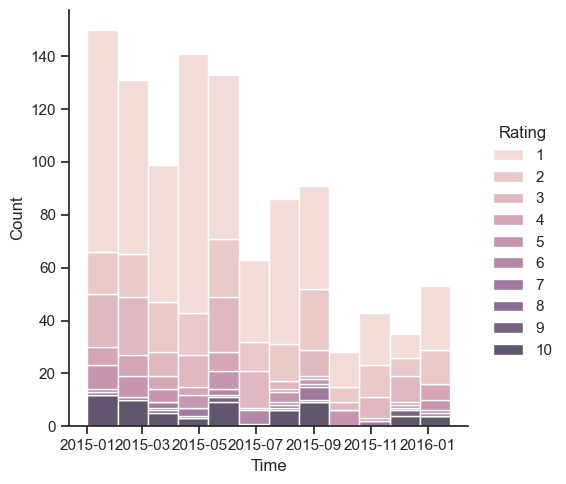

In [35]:
dataset['Time'] = pd.to_datetime(dataset['Time'], unit='s')
sns.displot(data=dataset, x="Time", hue="Rating", multiple="stack")

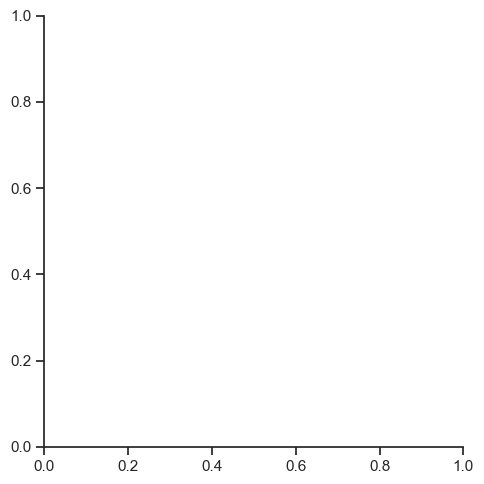

In [15]:
sns.displot(data=dataset.query('Rating<0'), x="Time", hue="Rating", multiple="stack")

In [16]:
# Crea il grafico a barre
fig4 = px.bar(
    data_frame=dataset.query('Rating< 0'),
    x='Time',
    color='Rating',
    barmode='stack'
)

In [17]:
px.histogram(dataset, x='Time', color="Rating", barmode='stack')

In [18]:
px.histogram(dataset.query('Rating<0'), x='Time', color="Rating", barmode='stack')